<a href="https://colab.research.google.com/github/lenganhoang/Text-Classification/blob/master/Question_of_TF_certi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Question 1

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)

In [ ]:
x=xs.reshape(-1,1)
y=ys.reshape(-1,1)

In [ ]:
x.shape, y.shape

((6, 1), (6, 1))

In [ ]:
# YOUR CODE HERE
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,input_dim=1, activation = 'linear')
])
model.compile(
    optimizer=tf.optimizers.Adam(0.01),
    loss='mse')

In [ ]:
model.fit(x,y,epochs=1000, batch_size=1,verbose=0)

In [ ]:
model.save('/content/gdrive/MyDrive/TF certi/question1.h5')

In [ ]:
model.predict([[10]])

array([[11.]], dtype=float32)

## Question 2:

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
# YOUR CODE HERE
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10 ,activation='softmax')
])
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_2.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 3s 2ms/step - loss: 0.5032 - accuracy: 0.8223
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3783 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3376 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3133 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2852 - accuracy: 0.8944
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2687 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2600 - accuracy: 0.9021
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2489 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2410 - accurac

In [ ]:
model_2.save('/content/gdrive/MyDrive/TF certi/question2.h5')

In [ ]:
predictions = model_2.predict(test_images)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10 ,activation='softmax')
])
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history_2=model_2.fit(train_images,train_labels,validation_data=(test_images,test_labels), verbose=1, epochs= 50 ,batch_size=1024, callbacks=[callback])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


59/59 [==============================] - 1s 15ms/step - loss: 0.8358 - accuracy: 0.7219 - val_loss: 0.5619 - val_accuracy: 0.8019
Epoch 2/50
59/59 [==============================] - 1s 12ms/step - loss: 0.4835 - accuracy: 0.8331 - val_loss: 0.4755 - val_accuracy: 0.8348
Epoch 3/50
59/59 [==============================] - 1s 13ms/step - loss: 0.4278 - accuracy: 0.8526 - val_loss: 0.4406 - val_accuracy: 0.8432
Epoch 4/50
59/59 [==============================] - 1s 12ms/step - loss: 0.3980 - accuracy: 0.8610 - val_loss: 0.4201 - val_accuracy: 0.8507
Epoch 5/50
59/59 [==============================] - 1s 13ms/step - loss: 0.3749 - accuracy: 0.8687 - val_loss: 0.4083 - val_accuracy: 0.8565
Epoch 6/50
59/59 [==============================] - 1s 13ms/step - loss: 0.3584 - accuracy: 0.8734 - val_loss: 0.3904 - val_accuracy: 0.8603
Epoch 7/50
59/59 [==============================] - 1s 12ms/step - loss: 0.3457 - accuracy: 0.8776 - val_loss: 0.3802 - val_accuracy: 0.8634
Epoch 8/50
59/59 [======

In [ ]:
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3342 - accuracy: 0.8871 - 451ms/epoch - 1ms/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

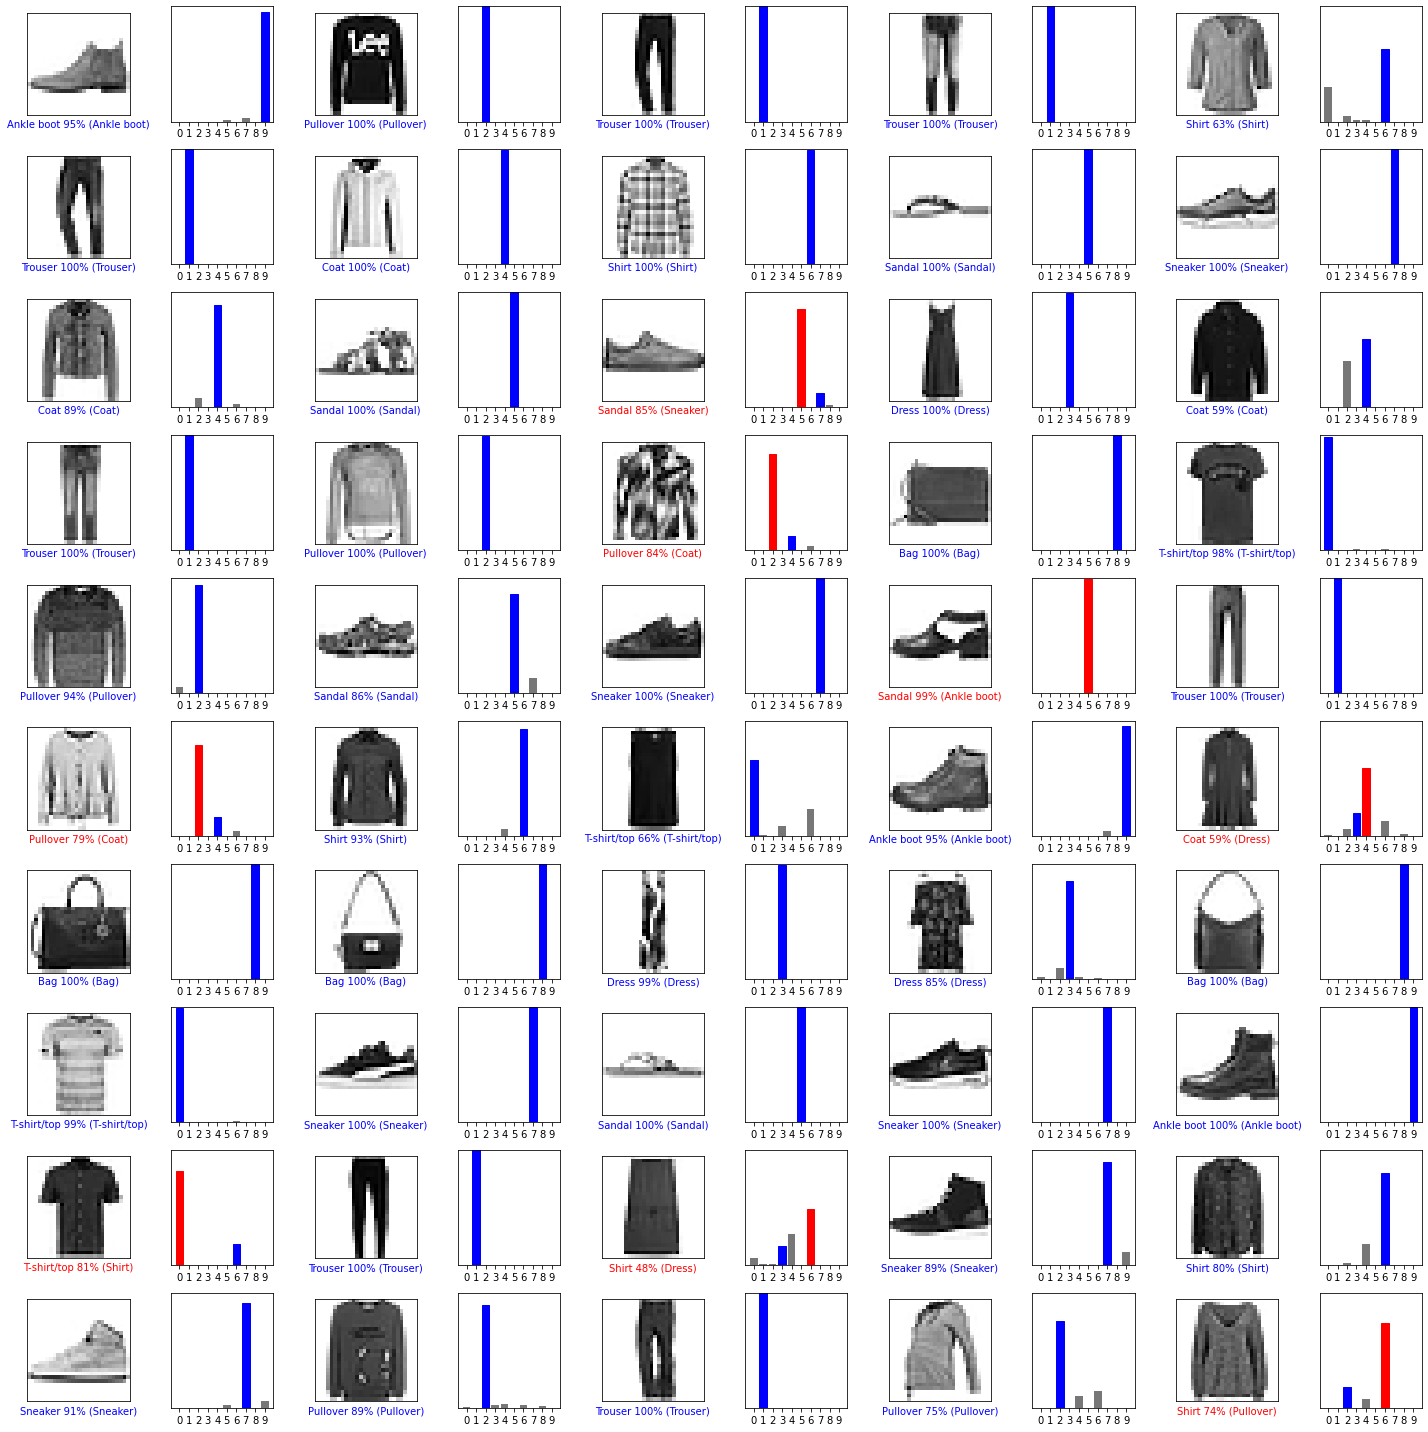

In [ ]:
import matplotlib.pyplot as plt
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

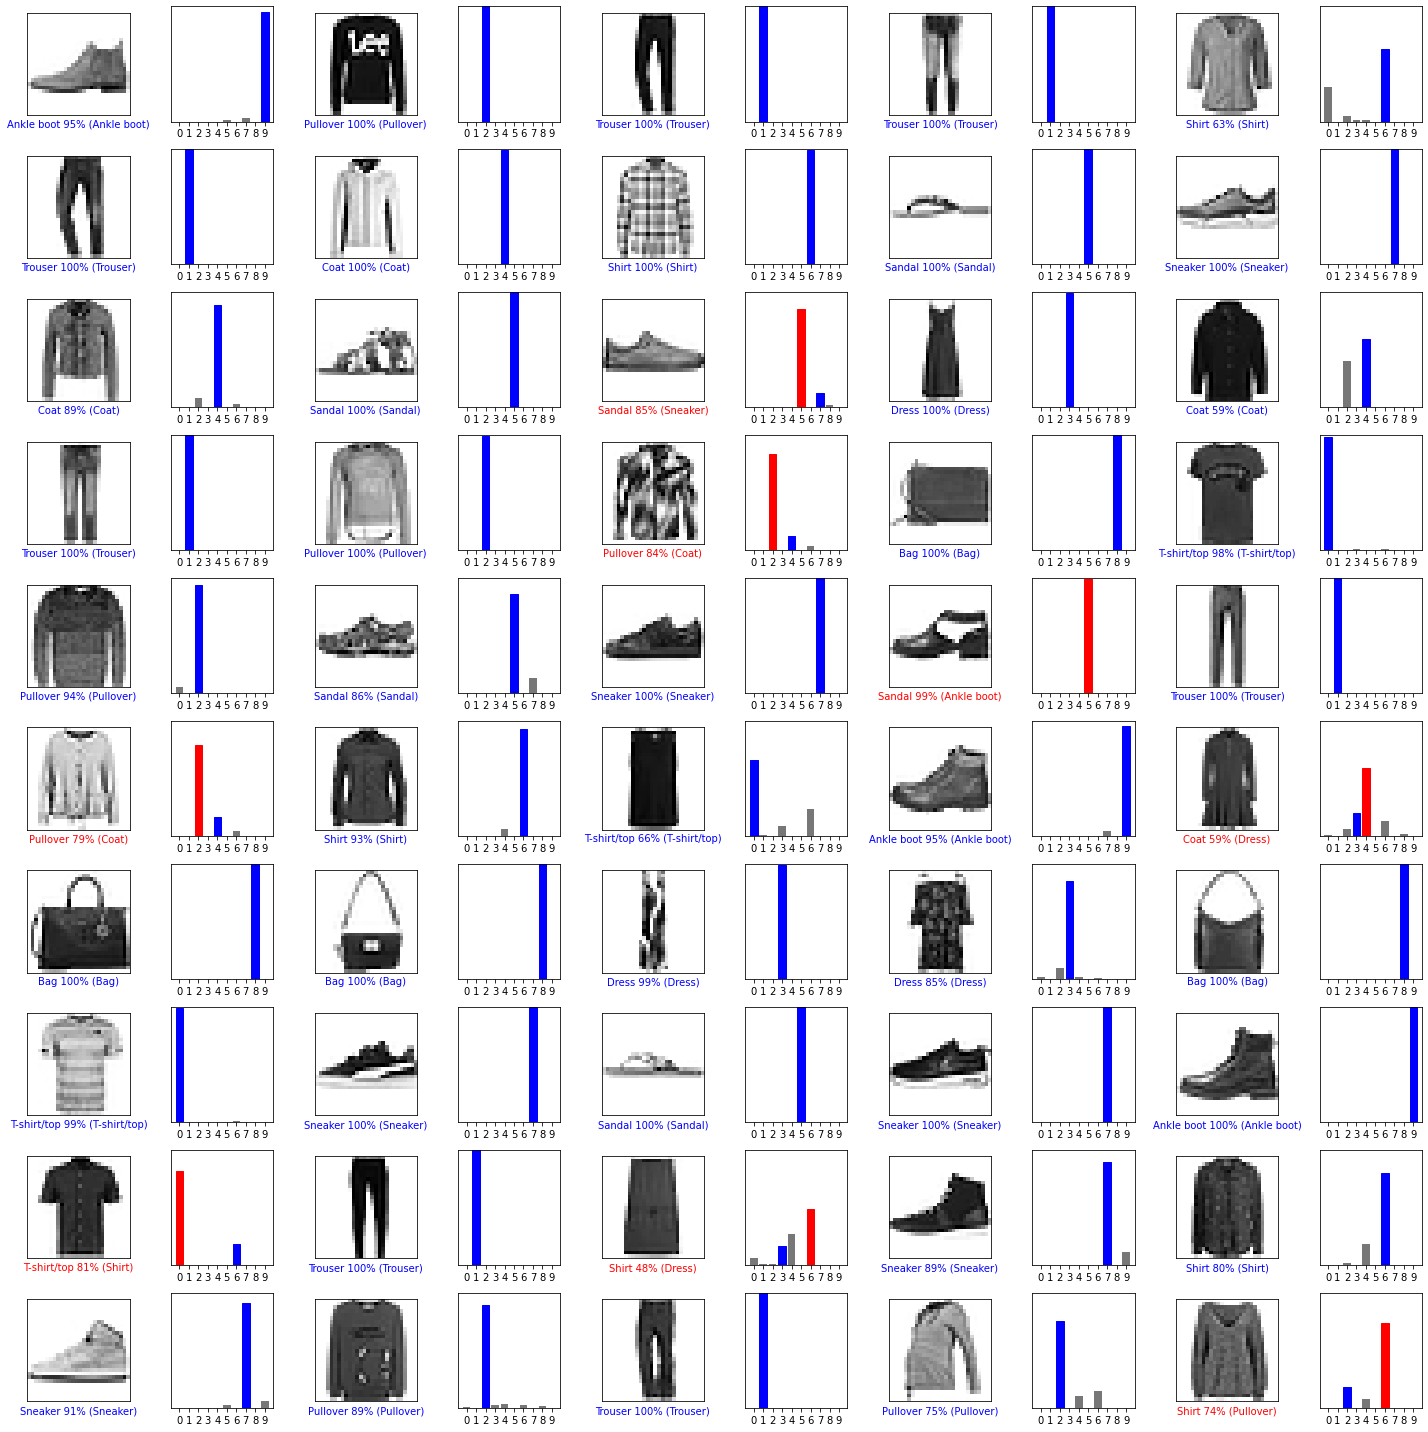

In [ ]:
import matplotlib.pyplot as plt
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Question 3

In [2]:
import urllib
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install tensorflow==2.3.0
!pip install tensorflow_datasets==3.2.1
!pip install Pillow==7.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.4 MB 52 kB/s 
     |████████████████████████████████| 459 kB 65.7 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
     |████████████████████████████████| 2.9 MB 39.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 14.1 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 14.7 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
_TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
_TEST_URL = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
urllib.request.urlretrieve(_TRAIN_URL, 'horse-or-human.zip')
local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/horse-or-human/')
zip_ref.close()
urllib.request.urlretrieve(_TEST_URL, 'testdata.zip')
local_zip = 'testdata.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/testdata/')
zip_ref.close()

In [ ]:
dir_train = 'tmp/horse-or-human/'
dir_test = 'tmp/testdata/'

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(dir_train,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( dir_test,
                                                    batch_size  = 20,
                                                    class_mode  = 'binary', 
                                                    target_size = (150, 150))



Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
 #Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()

--2022-05-27 04:07:30--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.128, 173.194.69.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   172MB/s    in 0.5s    

2022-05-27 04:07:31 (172 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []    

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


                                                                                                  
 conv2d_9 (Conv2D)              (None, 16, 16, 96)   55296       ['activation_8[0][0]']           
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 16, 16, 48)  144         ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 16, 16, 96)  288         ['conv2d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_6 (Activation)      (None, 16, 16, 48)   0           ['batch_normalization_6[0][0]']  
          

In [ ]:
callbacks = myCallback()
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 1027/20,
            epochs = 3,
            validation_steps = 256/20,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/3
51/51 - 87s - loss: 0.1652 - accuracy: 0.9426 - val_loss: 0.0023 - val_accuracy: 1.0000 - 87s/epoch - 2s/step
Epoch 2/3
51/51 - 49s - loss: 0.0407 - accuracy: 0.9805 - val_loss: 0.0285 - val_accuracy: 0.9883 - 49s/epoch - 956ms/step
Epoch 3/3
51/51 - 48s - loss: 0.0203 - accuracy: 0.9961 - val_loss: 2.3523e-04 - val_accuracy: 1.0000 - 48s/epoch - 930ms/step


In [ ]:
model.save('/content/gdrive/MyDrive/TF certi/question3.h5')

## Question 4

In [3]:
import json
import urllib
import pandas as pd

url = 'https://storage.googleapis.com/download.tensorflow.org/data/sarcasm.json'
urllib.request.urlretrieve(url, 'sarcasm.json')

# DO NOT CHANGE THIS CODE OR THE TESTS MAY NOT WORK
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

sentences = []
labels = []

# YOUR CODE HERE
with open('sarcasm.json', 'r') as f:
    data = json.load(f)

for d in data:
    sentences.append(d['headline'])
    labels.append(d['is_sarcastic'])


In [5]:
train_text = sentences[0:training_size]
test_text = sentences[training_size:]
train_labels = labels[0:training_size]
test_labels = labels[training_size:]

In [6]:
vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=vocab_size,
 output_sequence_length=max_length)
vectorize_layer.adapt(train_text)
def BiLSTM():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(1,), dtype=tf.string),
        vectorize_layer,
        tf.keras.layers.Embedding(
            vocab_size, embedding_dim, input_length=max_length,
            # Use masking to handle the variable sequence lengths
            mask_zero=True),
        #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
        #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
        #tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy'])
    return model

In [7]:
model = BiLSTM()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 120)              0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 120, 16)           16000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               4224      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 20,769
Trainable params: 20,769
Non-trai

In [8]:
num_epochs = 30
history = model.fit(train_text, train_labels, epochs=num_epochs, validation_data=(test_text, test_labels), verbose=2)

Epoch 1/30
625/625 - 73s - loss: 0.6695 - accuracy: 0.5603 - val_loss: 0.6011 - val_accuracy: 0.5633 - 73s/epoch - 118ms/step
Epoch 2/30
625/625 - 62s - loss: 0.4792 - accuracy: 0.7003 - val_loss: 0.4329 - val_accuracy: 0.7696 - 62s/epoch - 99ms/step
Epoch 3/30
625/625 - 62s - loss: 0.3929 - accuracy: 0.7962 - val_loss: 0.4090 - val_accuracy: 0.7958 - 62s/epoch - 100ms/step
Epoch 4/30
625/625 - 62s - loss: 0.3670 - accuracy: 0.8138 - val_loss: 0.3973 - val_accuracy: 0.8050 - 62s/epoch - 100ms/step
Epoch 5/30
625/625 - 62s - loss: 0.3526 - accuracy: 0.8283 - val_loss: 0.3924 - val_accuracy: 0.8019 - 62s/epoch - 100ms/step
Epoch 6/30
625/625 - 62s - loss: 0.3436 - accuracy: 0.8375 - val_loss: 0.3890 - val_accuracy: 0.8155 - 62s/epoch - 100ms/step
Epoch 7/30
625/625 - 62s - loss: 0.3382 - accuracy: 0.8396 - val_loss: 0.3892 - val_accuracy: 0.8103 - 62s/epoch - 99ms/step
Epoch 8/30
625/625 - 62s - loss: 0.3335 - accuracy: 0.8429 - val_loss: 0.3940 - val_accuracy: 0.8253 - 62s/epoch - 99ms/

In [9]:
model.save('/content/gdrive/MyDrive/TF certi/question4.h5')

NotImplementedError: ignored